In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
import datetime

In [2]:
date_today_record = str(datetime.datetime.now()).split(' ')[0].replace('-', '')
date_today_record

'20210521'

In [3]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_25.csv')
commerce_df = pd.read_csv(basedir + 'commerce_25.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [4]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '부동산유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
print(common_df.shape)
common_df.head()

(403505, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),부동산유형,건물연식
0,서울특별시 강남구 개포동,1264-3,제2종일반주거지역,8m미만,2006-08-29,29.23,11500.0,393.431406,1300.599641,연립다세대,29.0
1,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2006-12-20,56.10,56500.0,1007.130125,3329.355660,연립다세대,33.0
2,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2016-01-16,39.60,23300.0,588.383838,1945.070467,연립다세대,33.0
3,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2016-04-09,39.60,24500.0,618.686869,2045.245770,연립다세대,33.0
4,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2019-10-23,56.10,60000.0,1069.518717,3535.598930,연립다세대,33.0


In [5]:
dandok_filenames = [f for f in os.listdir('./국토교통부_실거래가_공개시스템/단독다가구/매매/') if (f.endswith('.csv'))&('(매매)' in f)]
dandok_filenames

['단독다가구(매매)_실거래가_20060101_20061231.csv',
 '단독다가구(매매)_실거래가_20070101_20071231.csv',
 '단독다가구(매매)_실거래가_20080101_20081231.csv',
 '단독다가구(매매)_실거래가_20090101_20091231.csv',
 '단독다가구(매매)_실거래가_20100101_20101231.csv',
 '단독다가구(매매)_실거래가_20110101_20111231.csv',
 '단독다가구(매매)_실거래가_20120101_20121231.csv',
 '단독다가구(매매)_실거래가_20130101_20131231.csv',
 '단독다가구(매매)_실거래가_20140101_20141231.csv',
 '단독다가구(매매)_실거래가_20150101_20151231.csv',
 '단독다가구(매매)_실거래가_20160101_20161231.csv',
 '단독다가구(매매)_실거래가_20170101_20171231.csv',
 '단독다가구(매매)_실거래가_20180101_20181231.csv',
 '단독다가구(매매)_실거래가_20190101_20191231.csv',
 '단독다가구(매매)_실거래가_20200101_20201231.csv',
 '단독다가구(매매)_실거래가_20210101_20210520.csv']

In [6]:
dfs_list = []
for f in dandok_filenames:
    df = pd.read_csv('./국토교통부_실거래가_공개시스템/단독다가구/매매/' + f, encoding='euc-kr', header=15)
    if '해제사유발생일' in df.columns:
        df = df[df['해제사유발생일'].isna()]
        df = df.drop(columns=['해제사유발생일'])
    dfs_list.append(df)

In [7]:
dandok_df = pd.concat(dfs_list).reset_index(drop=True)
print(dandok_df.shape)
dandok_df.head()

(195322, 11)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,서울특별시 강남구 개포동,2**,다가구,-,208.09,107.9,200604,17,"34,200",1989.0,NaN
1,서울특별시 강남구 개포동,2**,다가구,-,194.67,117.0,200604,18,"47,900",1993.0,NaN
2,서울특별시 강남구 개포동,2**,다가구,-,299.78,129.9,200601,24,"61,000",1994.0,NaN
3,서울특별시 강남구 개포동,2**,다가구,-,188.89,130.1,200605,16,"52,500",1993.0,NaN
4,서울특별시 강남구 개포동,2**,다가구,-,313.20,134.7,200606,27,"56,000",1992.0,NaN


In [8]:
dandok_df['구'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[1])
dandok_df['동'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[2])
dandok_df['거래금액(만원)'] = dandok_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
dandok_df['대지면적(㎡)'] = dandok_df['대지면적(㎡)'].apply(float)
dandok_df['단가(평)'] = dandok_df['거래금액(만원)'] / dandok_df['대지면적(㎡)'] * 3.305785

In [9]:
def day_modifier(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if len(x) == 1:
            return '0' + x
        else:
            return x

In [10]:
dandok_df['계약날짜'] = dandok_df['계약년월'].apply(lambda x: str(x)[:4]) + '-' +\
dandok_df['계약년월'].apply(lambda x: str(x)[-2:]) + '-' + dandok_df['계약일'].apply(day_modifier)

In [11]:
dandok_df['계약날짜'] = pd.to_datetime(dandok_df['계약날짜'])

In [12]:
dandok_df.drop(columns=['계약년월', '계약일'], inplace=True)

In [13]:
common_df['구'] = common_df['시군구'].apply(lambda x: x.split(' ')[1])
dandok_df['구'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[1])
common_df['동'] = common_df['시군구'].apply(lambda x: x.split(' ')[2])
dandok_df['동'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[2])

In [14]:
target_gu = '관악구'
target_dong = '신림동'
target_purpose = '2종일반'
date_today = pd.to_datetime(datetime.datetime.now())
target_period = 18 # in months

In [15]:
target_df = common_df[
    (common_df['구'] == target_gu)
    &(common_df['동'] == target_dong)
    &(common_df['용도지역'].str.contains(target_purpose))
    &(common_df['계약날짜'] >= (date_today - pd.DateOffset(months=target_period)))
].sort_values(['번지'])
print(target_df.shape)
target_df.head()

(577, 13)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),부동산유형,건물연식,구,동
110516,서울특별시 관악구 신림동,1**,제2종일반주거지역,-,2020-12-17,10.0,1700.0,170.000000,561.983450,토지,NaN,관악구,신림동
29385,서울특별시 관악구 신림동,1**,제2종일반주거,8m미만,2020-03-10,301.0,235209.0,781.425249,2583.223867,상업업무,28.0,관악구,신림동
110515,서울특별시 관악구 신림동,1**,제2종일반주거지역,-,2020-12-17,9.5,1615.0,170.000000,561.983450,토지,NaN,관악구,신림동
110665,서울특별시 관악구 신림동,1**,제2종일반주거지역,-,2020-12-23,30.0,5100.0,170.000000,561.983450,토지,NaN,관악구,신림동
108251,서울특별시 관악구 신림동,1***,제2종일반주거지역,25m미만,2020-08-21,13.0,6949.0,534.538462,1767.069228,토지,NaN,관악구,신림동


In [16]:
dandok_target_df = dandok_df[
    (dandok_df['구'] == target_gu)
    &(dandok_df['동'] == target_dong)
    &(dandok_df['계약날짜'] >= (date_today - pd.DateOffset(months=target_period)))
].sort_values(['번지'], ascending=False)
print(dandok_target_df.shape)
dandok_target_df.head()

(440, 13)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,도로명,구,동,단가(평),계약날짜
182688,서울특별시 관악구 신림동,산7*,단독,8m미만,16.00,26.0,54300,1985.0,원신9길,관악구,신림동,6904.004827,2020-12-13
182689,서울특별시 관악구 신림동,산7*,단독,25m미만,26.44,29.0,34700,1970.0,원신11길,관악구,신림동,3955.542741,2020-05-23
182847,서울특별시 관악구 신림동,산*,단독,12m미만,90.25,169.0,60000,1978.0,NaN,관악구,신림동,1173.651479,2020-05-14
182850,서울특별시 관악구 신림동,9*,단독,8m미만,245.70,172.0,89400,1990.0,신림로44다길,관악구,신림동,1718.239413,2020-10-22
182797,서울특별시 관악구 신림동,9*,단독,8m미만,213.21,139.0,51700,1989.0,복은10길,관악구,신림동,1229.561759,2020-04-17


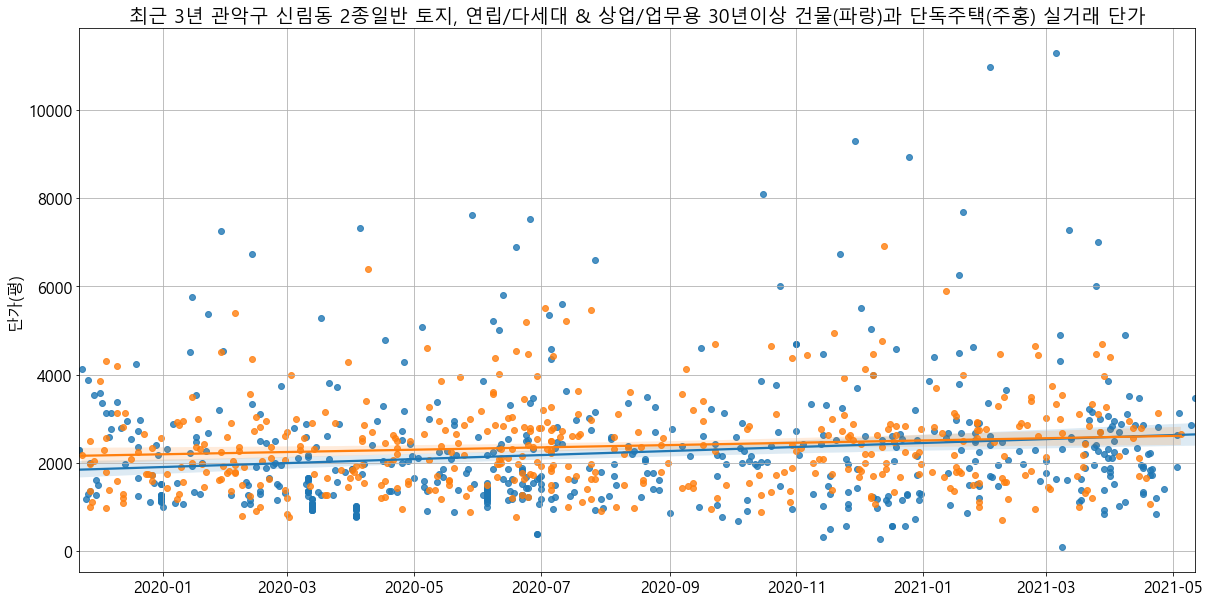

In [18]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
plt.title('최근 3년 {} {} {} 토지, 연립/다세대 & 상업/업무용 30년이상 건물(파랑)과 단독주택(주홍) 실거래 단가'.format(target_gu, target_dong, target_purpose))
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])#, order=3, ci=None)
ax.xaxis.update_units(dandok_target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(dandok_target_df['계약날짜']), y=dandok_target_df['단가(평)'])#, order=3, ci=None)
#plt.ylim([0, 6000])
plt.savefig(basedir + '{}_{}_{}_{}/산포도.png'.format(target_gu, target_dong, target_purpose, date_today_record))

In [19]:
target_df = target_df.sort_values(['단가(평)'], ascending=False).reset_index(drop=True)
target_df.to_excel(basedir + '{}_{}_{}_{}/실거래가.xlsx'.format(target_gu, target_dong, target_purpose, date_today_record), index=False)

In [20]:
target_df.head()

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),부동산유형,건물연식,구,동
0,서울특별시 관악구 신림동,349-1,제2종일반주거지역,8m미만,2021-03-06,21.08,72000.0,3415.559772,11291.106262,연립다세대,28.0,관악구,신림동
1,서울특별시 관악구 신림동,349-1,제2종일반주거지역,8m미만,2021-02-02,21.08,70000.0,3320.683112,10977.464421,연립다세대,28.0,관악구,신림동
2,서울특별시 관악구 신림동,394-14,제2종일반주거지역,8m미만,2020-11-29,19.94,56000.0,2808.425276,9284.050150,연립다세대,28.0,관악구,신림동
3,서울특별시 관악구 신림동,394-14,제2종일반주거지역,8m미만,2020-12-25,24.89,67300.0,2703.897147,8938.502632,연립다세대,28.0,관악구,신림동
4,서울특별시 관악구 신림동,349-1,제2종일반주거지역,8m미만,2020-10-16,23.27,57000.0,2449.505801,8097.539536,연립다세대,28.0,관악구,신림동


In [22]:
inv_df = target_df[(target_df['계약날짜'] > pd.to_datetime('2020-05-01'))&(target_df['계약날짜'] < pd.to_datetime('2020-07-01'))]
print(inv_df.shape)

(104, 13)


In [24]:
inv_df = inv_df.sort_values(['번지', '건물연식', '계약날짜'])
inv_df

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),부동산유형,건물연식,구,동
184,서울특별시 관악구 신림동,1***,제2종일반주거,12m미만,2020-06-12,222.20,163000.0,733.573357,2425.035801,상업업무,25.0,관악구,신림동
80,서울특별시 관악구 신림동,1***,제2종일반주거,12m미만,2020-06-16,224.40,224000.0,998.217469,3299.892335,상업업무,38.0,관악구,신림동
108,서울특별시 관악구 신림동,10-435,제2종일반주거지역,8m미만,2020-05-20,19.60,17500.0,892.857143,2951.593750,연립다세대,30.0,관악구,신림동
162,서울특별시 관악구 신림동,10-694,제2종일반주거지역,8m미만,2020-06-15,80.99,62000.0,765.526608,2530.666379,연립다세대,32.0,관악구,신림동
342,서울특별시 관악구 신림동,108-14,제2종일반주거지역,8m미만,2020-05-06,23.03,11000.0,477.637864,1578.968085,연립다세대,26.0,관악구,신림동
353,서울특별시 관악구 신림동,108-14,제2종일반주거지역,8m미만,2020-05-30,20.13,9300.0,461.997019,1527.262817,연립다세대,26.0,관악구,신림동
51,서울특별시 관악구 신림동,110-66,제2종일반주거지역,8m미만,2020-06-03,26.46,30900.0,1167.800454,3860.497222,연립다세대,46.0,관악구,신림동
346,서울특별시 관악구 신림동,119-1,제2종일반주거지역,8m미만,2020-06-15,66.00,31000.0,469.696970,1552.717197,연립다세대,41.0,관악구,신림동
217,서울특별시 관악구 신림동,120-96,제2종일반주거지역,8m미만,2020-05-13,25.83,17500.0,677.506775,2239.691734,연립다세대,35.0,관악구,신림동
218,서울특별시 관악구 신림동,120-96,제2종일반주거지역,8m미만,2020-06-08,25.83,17500.0,677.506775,2239.691734,연립다세대,35.0,관악구,신림동
